In [26]:
import numpy as np
from scipy import integrate
import math
import pylab as plt
%matplotlib inline

#constants:
h_bar= (6.626*10**-34)/(2*np.pi)
kb= 1.38064852 * 10**-23
c= 2.998*10**8
T= 1 #temp of sun in K
a= 10**-10
b= np.inf


def f(x):
    return np.exp(-x)*(x**3)/ (1-np.exp(-x))


y,error= integrate.quad(f,a,b)
print (y)

y *= ((kb**4) * (T**4)) / ((4*np.pi**2) * (c**2) * (h_bar**3))

print("W is ",y)
print ("error is",error)

#part c confirming stefan-Boltsman consant

SB= y/(T**4)
print ("stefan's Boltsman constant is ",SB)
    

    
    

6.49393940226683
W is  5.670261331780271e-08
error is 2.6284711950259174e-09
stefan's Boltsman constant is  5.670261331780271e-08


Text(0,0.5,'Intensity(W/m^2)')

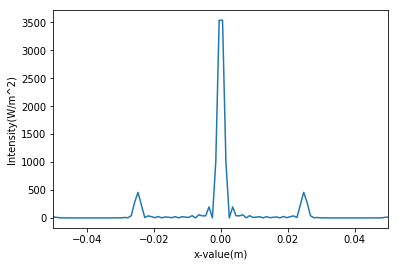

In [36]:
import cmath
import matplotlib.pyplot as plt

% matplotlib inline


#Constants:
separation= 20e-6             #seperation of slits on grating units= meters
w= 10*separation              #width of screen in meters
alpha= math.pi /separation
beta= alpha/2
f = 1                         #focal length in meter
lamda = 5e-7                  #wavelength of incident light in meters

screen=10e-2                  #width of screen in meters

#constants for simpsons
N = 100                       #number of steps to take
a = -w/2                      #lower boundary
b = w/2                       #upper boundary
h = ((b-a)/N)                 #size of step


def q(u):
    """Calculates the fraction of inicdent light that the grating lets through.
    
    arguments:
    u = distance along the grating
    
    returns: scalar float value that represents the fraction 
    of incident light that the grating lets through"""# return vlaue meaning taken from McDermott's docstring
    return math.sin(alpha*u)**2

def qbeta(u):
    """Calculates the fraction of inicdent light that the grating lets through.
    
    arguments:
    u = distance along the grating
    
    returns: scalar float value that represents the fraction 
    of incident light that the grating lets through"""# return vlaue meaning taken from McDermott's docstring
    return (math.sin(alpha*u)**2)*(math.sin(beta*u)**2)

def integrand(func,u,x):
    """Calculate integrand of light intensity
    arguments:
    func = function for calculating kernel of diffraction grating
    u = distance along grating
    x = distance along screen 
    
    returns: scalar float value that represents the fraction 
    of incident light that the grating lets through""" # return vlaue meaning taken from McDermott's docstring
    return math.sqrt(func(u))*cmath.exp(1j*2*math.pi*x*u/(lamda*f))


x_vals = np.linspace(-screen/2,screen/2,100)   
y_vals = []
for i in x_vals:                            #calculates light intensity (y_vals) as a function of x (distance along screen)
    s =(integrand(q,a,i)/3) + (integrand(q,b,i)/3) #uses simpson's rule
    for k in range(1,100):                       
        if(k % 2 == 1):
            s += 4/3*integrand(q,a+(k)*h,i)
        else:
            s += 2/3*integrand(q,a+(k)*h,i)
    y_vals.append(abs(s)**2)
    
plt.plot(x_vals,y_vals)
plt.xlim(-0.05,0.05)
plt.xlabel("x-value(m)")
plt.ylabel("Intensity(W/m^2)")


Text(0,0.5,'Intensity(W/m^2)')

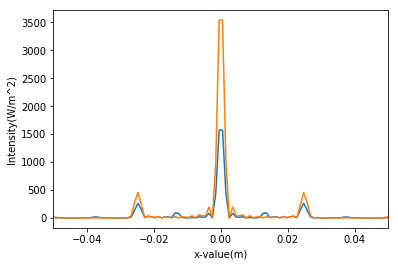

In [37]:
#constants







z_vals = []
for i in x_vals:
    s =(integrand(qbeta,a,i)/3) + (integrand(qbeta,b,i)/3)
    for k in range(1,100):
        if(k % 2 == 1):
            s += 4/3*integrand(qbeta,a+(k)*h,i)
        else:
            s += 2/3*integrand(qbeta,a+(k)*h,i)
    z_vals.append(abs(s)**2)
    
plt.plot(x_vals,z_vals)
plt.plot(x_vals,y_vals)
plt.xlim(-0.05,0.05)
plt.xlabel("x-value(m)")
plt.ylabel("Intensity(W/m^2)")